# Welcome to didactic-sniffle

In this project I am going to analyse the kaggle dataset based on Spotify API data.
The dataset is located in "***data.csv***" file.

In order to proceed with the project we need to load the dataset. For this I will be using Pandas library and import the dataset direclty into the Pandas Dataframe:

In [56]:
from IPython.display import display, HTML
import pandas as pd

#data-set will be imported into [df] dataframe
df = pd.read_csv('data.csv')


Let's now check the header of the dataset and the overall condition of the data:

In [23]:
#Check if the dataset contains the column headers
df.head()
#Also let's have a look at the data-type
df.info()

num_rows = df.shape[0]
num_cols = df.shape[1]

print('The dataset contains', num_rows, 'rows and', num_cols, 'columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91263 entries, 0 to 91262
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           91263 non-null  float64
 1   year              91263 non-null  int64  
 2   acousticness      91263 non-null  float64
 3   artists           91263 non-null  object 
 4   danceability      91263 non-null  float64
 5   duration_ms       91263 non-null  int64  
 6   energy            91263 non-null  float64
 7   explicit          91263 non-null  int64  
 8   id                91263 non-null  object 
 9   instrumentalness  91263 non-null  float64
 10  key               91263 non-null  int64  
 11  liveness          91263 non-null  float64
 12  loudness          91263 non-null  float64
 13  mode              91263 non-null  int64  
 14  name              91263 non-null  object 
 15  popularity        91263 non-null  int64  
 16  release_date      91263 non-null  object

As we can see the data-set is highly usable as contains ***91263*** entries with ***NONE*** non-null values in all columns.
This however does not rule out the potential duplicates. Let's also have a look at that.

In [27]:
#Create a dataframe consisted of duplicated values (doubled,trippled,etc.)
duplicatedDFrow = df[df.duplicated()]

print(duplicatedDFrow)

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo]
Index: []


Perfect! Let's get down to work!

## "LOUDNESS WAR"

The loudness war (or loudness race) refers to the trend of increasing audio levels in recorded music, which reduces audio fidelity, and according to many critics, listener enjoyment. Increasing loudness was first reported as early as the 1940s, with respect to mastering practices for 7" singles. The maximum peak level of analog recordings such as these is limited by varying specifications of electronic equipment along the chain from source to listener, including vinyl and Compact Cassette players. The issue garnered renewed attention starting in the 1990s with the introduction of digital signal processing capable of producing further loudness increases.

Let us have a look at this phonomenon and check with data provided by Spotify if this can be confirmed.
In order to do that, we will calculate the average **loudness** value per each ***year*** and sort it ascending date.

In [33]:
df_loudness = df.groupby('year')['loudness'].mean()

year
1926   -19.847121
1928   -17.998077
1930   -12.543371
1935   -15.809270
1936   -14.914250
Name: loudness, dtype: float64

Let's visualise this, shall we?

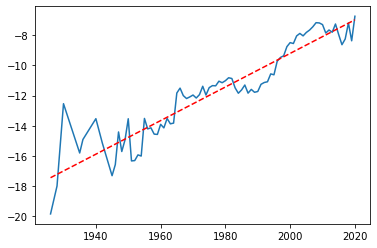

In [82]:
#Dataset series interpolation chart
x = df_loudness.index
y = list(df_loudness)
plt.plot(x, y)

#Adding trendline by polyfit
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


As we can see, the plot has ***confirmed*** the positive trend of increasing loudness.

## Modality vs Popularity

The next questions that always wondered me was if there was a bias towards specific modality. Let's have alook at the genetal correlation chart first:

<AxesSubplot:>

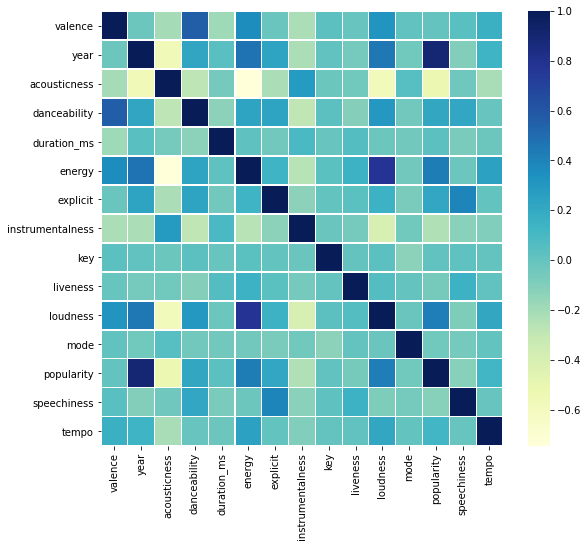

In [5]:
#Importing chart libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

#Plot correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

The initial graph shows poor correlation between "mode" and "popularity". Let's plot a visual chart showing the relations between those two datasets:

In [13]:
mode_mean = df.groupby('mode')['popularity'].mean()
mode_mean

mode
0    30.817284
1    29.065122
Name: popularity, dtype: float64

We can see that there is almost equal average popularity between minor and major songs. Statistically - makes sense, yet still not convinced! Let's have a closer look at the popularity dataset:


<AxesSubplot:>

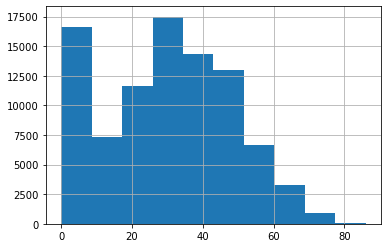

In [18]:
#Let's see the popularity column histogram
df['popularity'].hist()

Now we might have found something. This may look like like a skew right histogram - have a look at the first modality spike next to "0". Let's look at the numbers:

In [19]:
df.groupby('popularity')['popularity'].count()

popularity
0     11735
1      1264
2       703
3       538
4       376
      ...  
82        7
83        4
84        5
85        3
86        2
Name: popularity, Length: 87, dtype: int64

So... there is a 11735 songs with popularity = 0. Let's stop and think about this for a second. Why is that? And what does this mean for our study?
...
Let's assume that there are 11K songs which no one has ever heard due to various reasons /promotion, etc./ should we take them into consideration for determining public preferences for minor or major modality? I do not think so. Let's focus only on the ones which were heard at least by someone:

<AxesSubplot:>

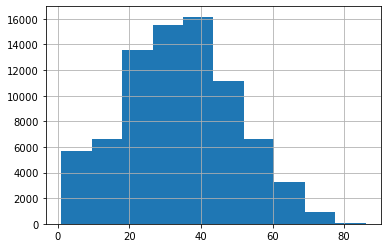

In [27]:
#Pick only columns with popularity and modality
df_popularityAboveZero = df.filter(items=['popularity', 'mode'])
#Remove the rows with Popularity = 0
df_popularityAboveZero = df_popularityAboveZero[df_popularityAboveZero['popularity'] > 0]

#Check the popularity column hostogram
df_popularityAboveZero['popularity'].hist()

Once we have this sorted out, let's check now the relation between popularity and modality:

<AxesSubplot:xlabel='popularity'>

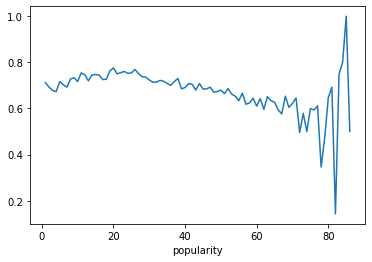

In [32]:
mode_mean = df_popularityAboveZero.groupby('popularity')['mode'].mean()
mode_mean.plot()

Conclusion: Although we have removed the unpopular rows we still notice ***weak correlation*** between popularity and song's modality. There is a general bias towards MAJOR songs being more popular.
Note: The spikes of the data towards higer popularity are caused by the low number or input data with high popularity (see histogram above).

## Energy vs Loudness

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
Loudness we have already covered in the first point.

At this point we can expect correlation between those two variables. Let's however add some data to this "gut-feeleing".


<AxesSubplot:>

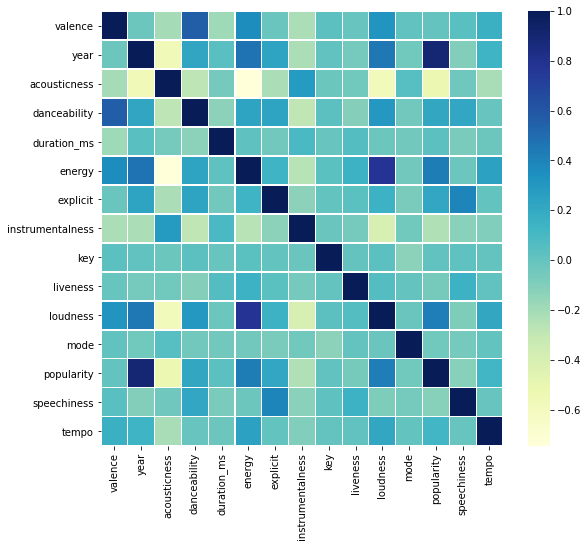

In [35]:
#Importing chart libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

#Plot correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

On our previously seen plot we can notice that the correlation level is "hot" between song's loudness and energy.
Let's have a closer look at the data:

<AxesSubplot:xlabel='energy', ylabel='loudness'>

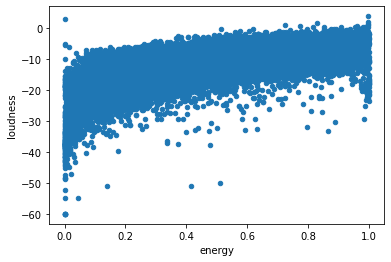

In [42]:
#Filter columns with energy and loudness values
df_EnergyVsLoudness = df.filter(items=['loudness', 'energy'])

df_EnergyVsLoudness.plot.scatter(x='energy', y='loudness')

Awww... ^^ , this looks like a bubbles in a cold beer on Friday evening...
...but we do not need to see the level of data spread today. Let's narrow this down to average:

<AxesSubplot:xlabel='energy'>

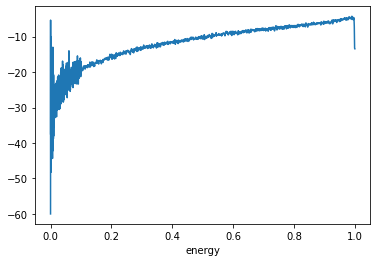

In [45]:
#Group data by adding only mean values
df_EnergyVsLoudness_mean = df_EnergyVsLoudness.groupby('energy')['loudness'].mean()
#Plot time!
df_EnergyVsLoudness_mean.plot()

TA-DAM! 
We confirm that songs ***energy levels are growing along with growing loudness***. This is exactly what we predicted with our "gutt-feeleing". Well done!

## Additional findings (!)

Let's generate a correlation matrix once again:

<AxesSubplot:>

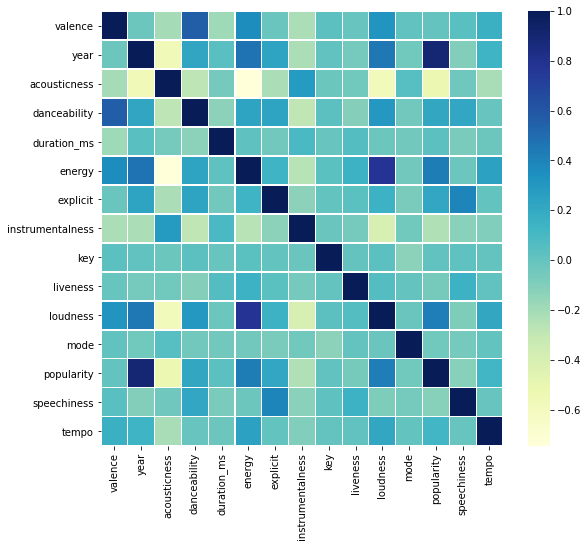

In [59]:
#Importing chart libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

#Plot correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Notice high correlation between "popularity" and "year". We need to check this out!!!
Let's filter the data, sort, and visualize:

<AxesSubplot:xlabel='year'>

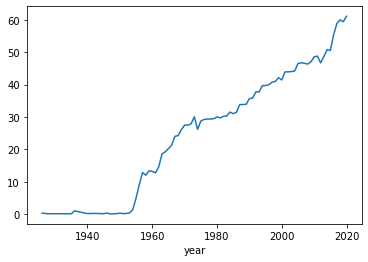

In [58]:
#Filtering only year and popularity from the entire DataFrame
WTF_finding = df.filter(items=['year', 'popularity'])
#Narrowing down the data to average values
WTF_finding = WTF_finding.groupby('year')['popularity'].mean()
WTF_finding.plot()

***CONCLUSIONS***
We can tell that music before 1960 is not so popular. There are many reasons for that, e.g. low energy of the songs:

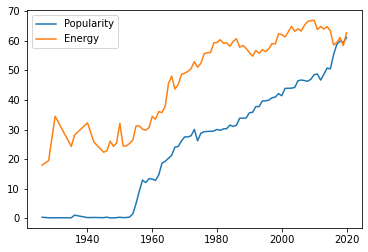

In [71]:
import matplotlib.pyplot as plt 

#Filtering only year and popularity from the entire DataFrame
WTF_finding2 = df.filter(items=['year', 'energy'])

#Narrowing down the data to average values
WTF_finding2 = WTF_finding2.groupby('year')['energy'].mean()
fig, ax = plt.subplots()
ax.plot(WTF_finding, label="Popularity")
ax.plot(WTF_finding2*100, label="Energy")
ax.legend()

plt.show()

See?

However... the most important rule in the business is...

In [77]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://memegenerator.net/img/instances/43454210.jpg")